In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [2]:
def calculate_classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [3]:
def matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [4]:
data = pd.read_csv('students_ds.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [8]:
data.shape

(4424, 35)

In [9]:
data.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [11]:
encoder = LabelEncoder()

In [12]:
data['Target'] = encoder.fit_transform(data['Target'])

In [13]:
target_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(target_mapping)

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


<AxesSubplot: >

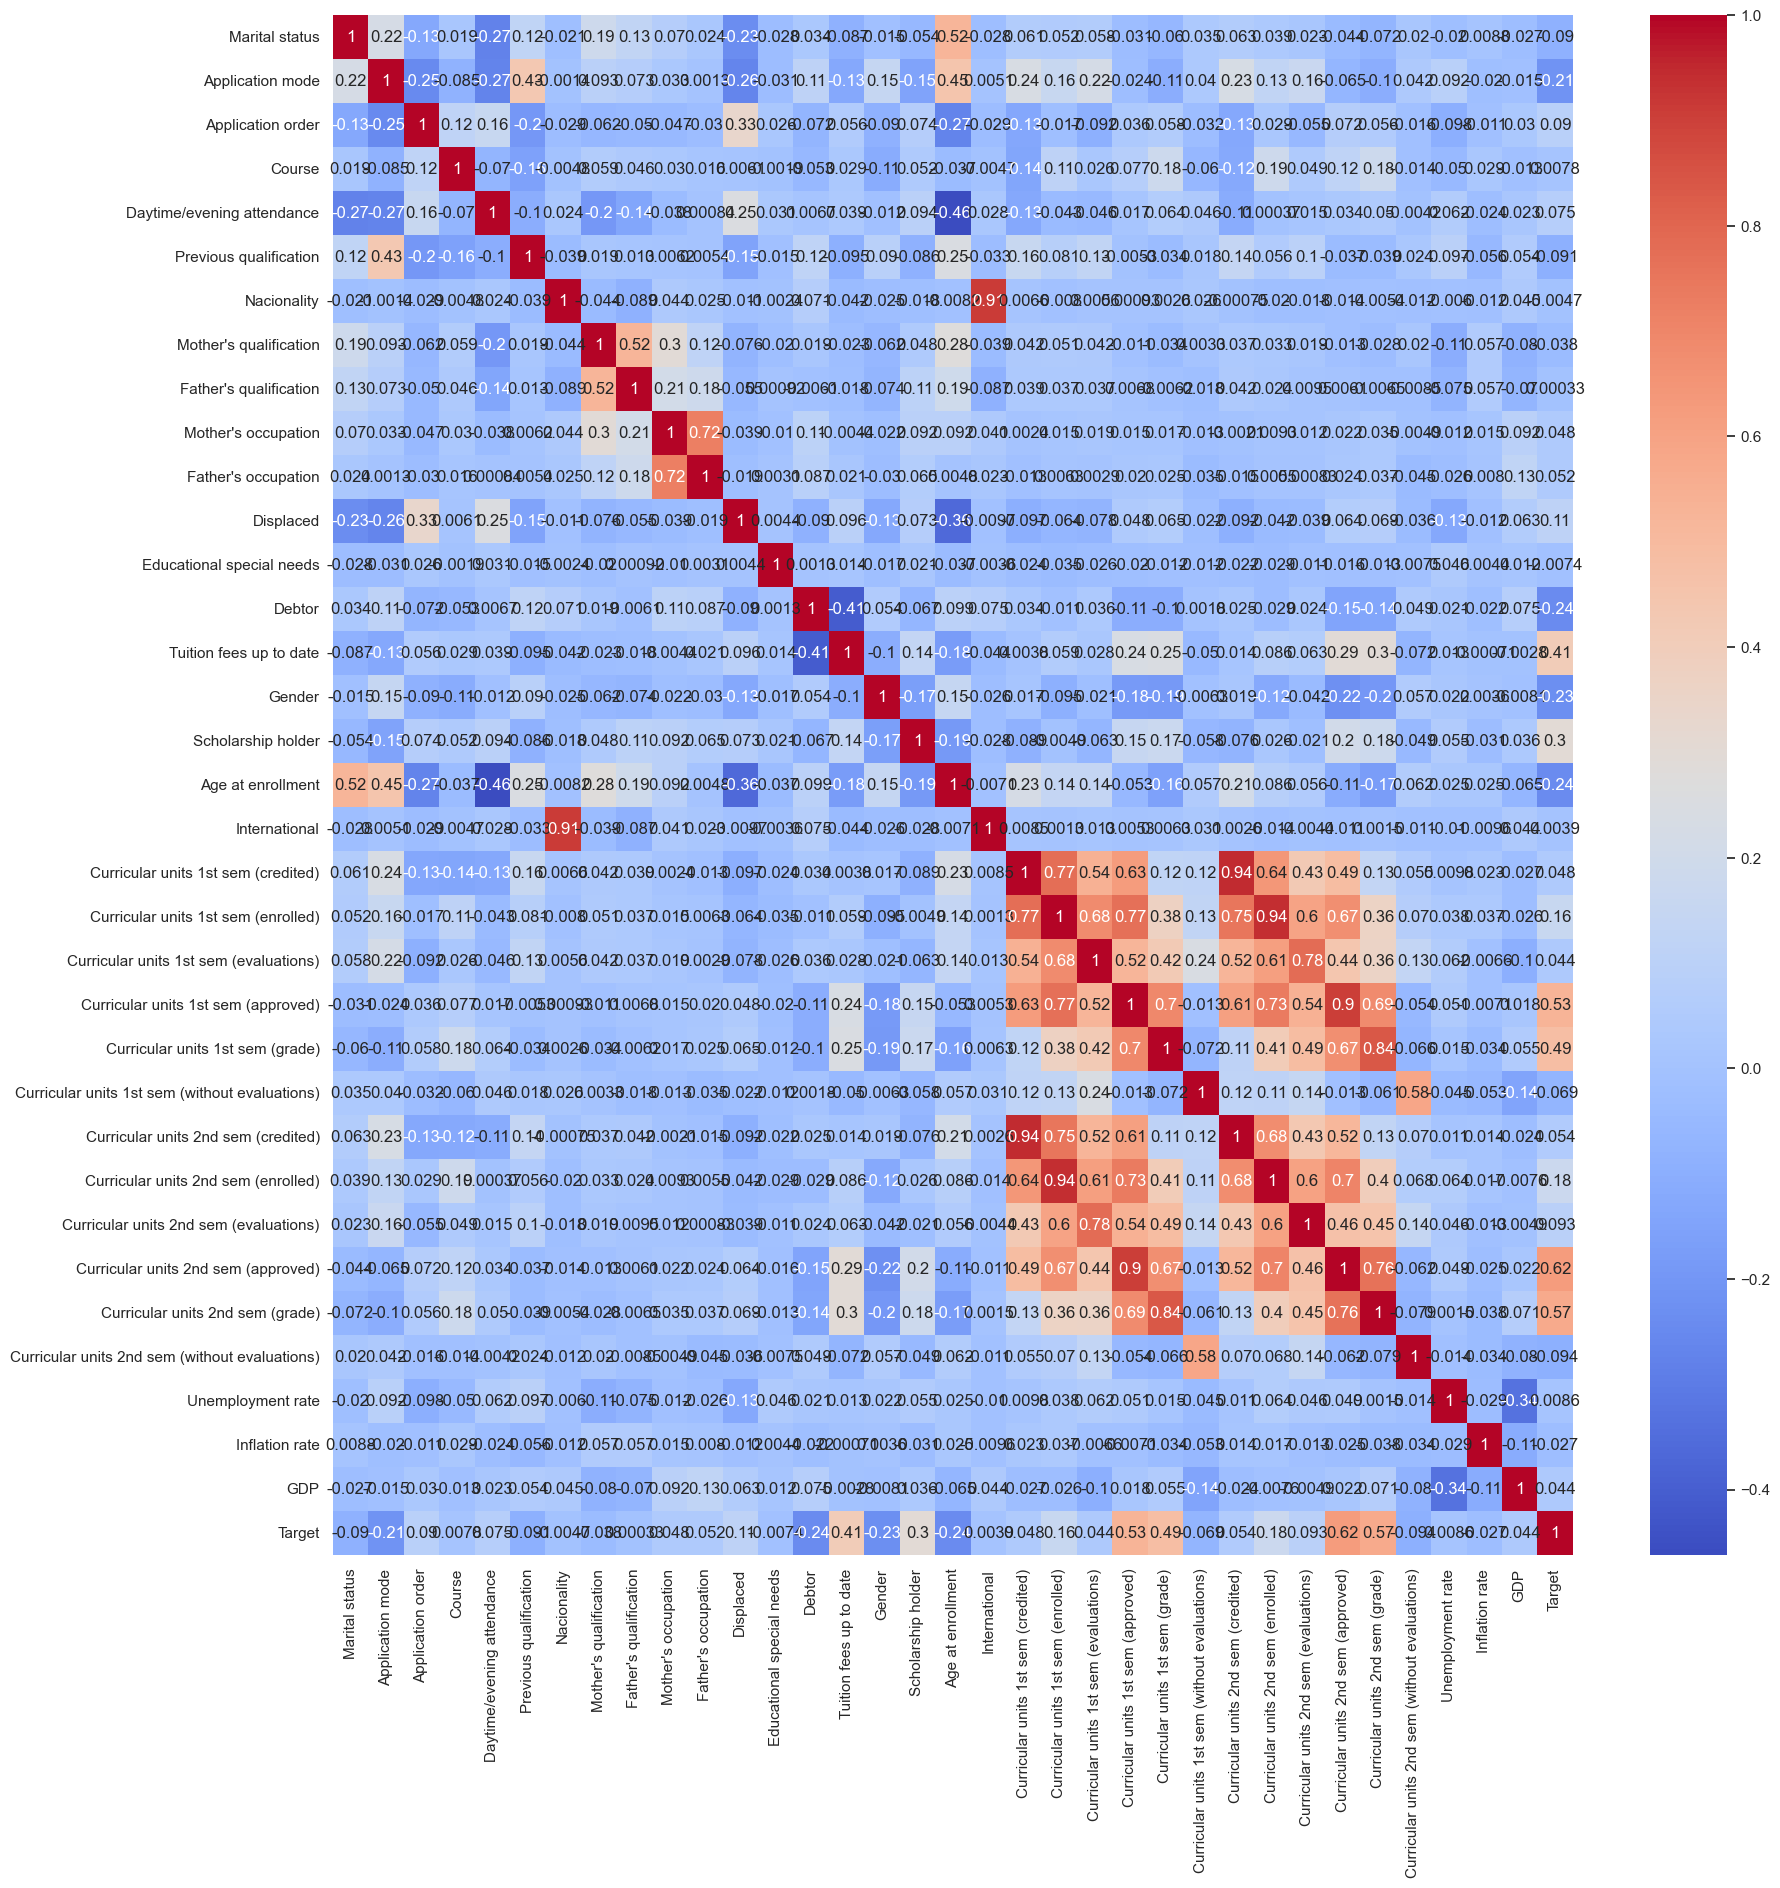

In [14]:
corr = data.corr()
sns.set(rc={'figure.figsize':(20, 20)})
# Create a heatmap using the filtered correlations
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [15]:
data = data.drop(columns = ['Nacionality'], axis = 1)

In [16]:
data = data.drop(columns=['Curricular units 1st sem (approved)'], axis = 1)

In [17]:
data = data.drop(columns=['Curricular units 1st sem (credited)'], axis = 1)

In [18]:
data = data.drop(columns=["Father's qualification"], axis = 1)

In [19]:
data = data.drop(columns=["Mother's occupation"], axis = 1)

In [20]:
data = data.drop(columns=["Curricular units 1st sem (enrolled)"], axis = 1)

In [21]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,1,0,0,1,1,0,20,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,4,1,0,0,0,1,0,19,0,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,22,10,1,0,0,0,1,0,19,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,4,1,0,0,1,0,0,20,0,8,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,22,10,0,0,0,1,0,0,45,0,9,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [22]:
x = data.drop(columns = ['Target'], axis = 1)

In [23]:
scaler = StandardScaler()

In [24]:
x['Curricular units 1st sem (grade)'] = scaler.fit_transform(x['Curricular units 1st sem (grade)'].to_numpy().reshape(-1, 1))

In [25]:
x['Curricular units 2nd sem (grade)'] = scaler.fit_transform(x['Curricular units 2nd sem (grade)'].to_numpy().reshape(-1, 1))

In [26]:
x['Unemployment rate'] = scaler.fit_transform(x['Unemployment rate'].to_numpy().reshape(-1, 1))

In [27]:
x['Inflation rate'] = scaler.fit_transform(x['Inflation rate'].to_numpy().reshape(-1, 1))

In [28]:
x['GDP'] = scaler.fit_transform(x['GDP'].to_numpy().reshape(-1, 1))

In [29]:
y = data['Target']

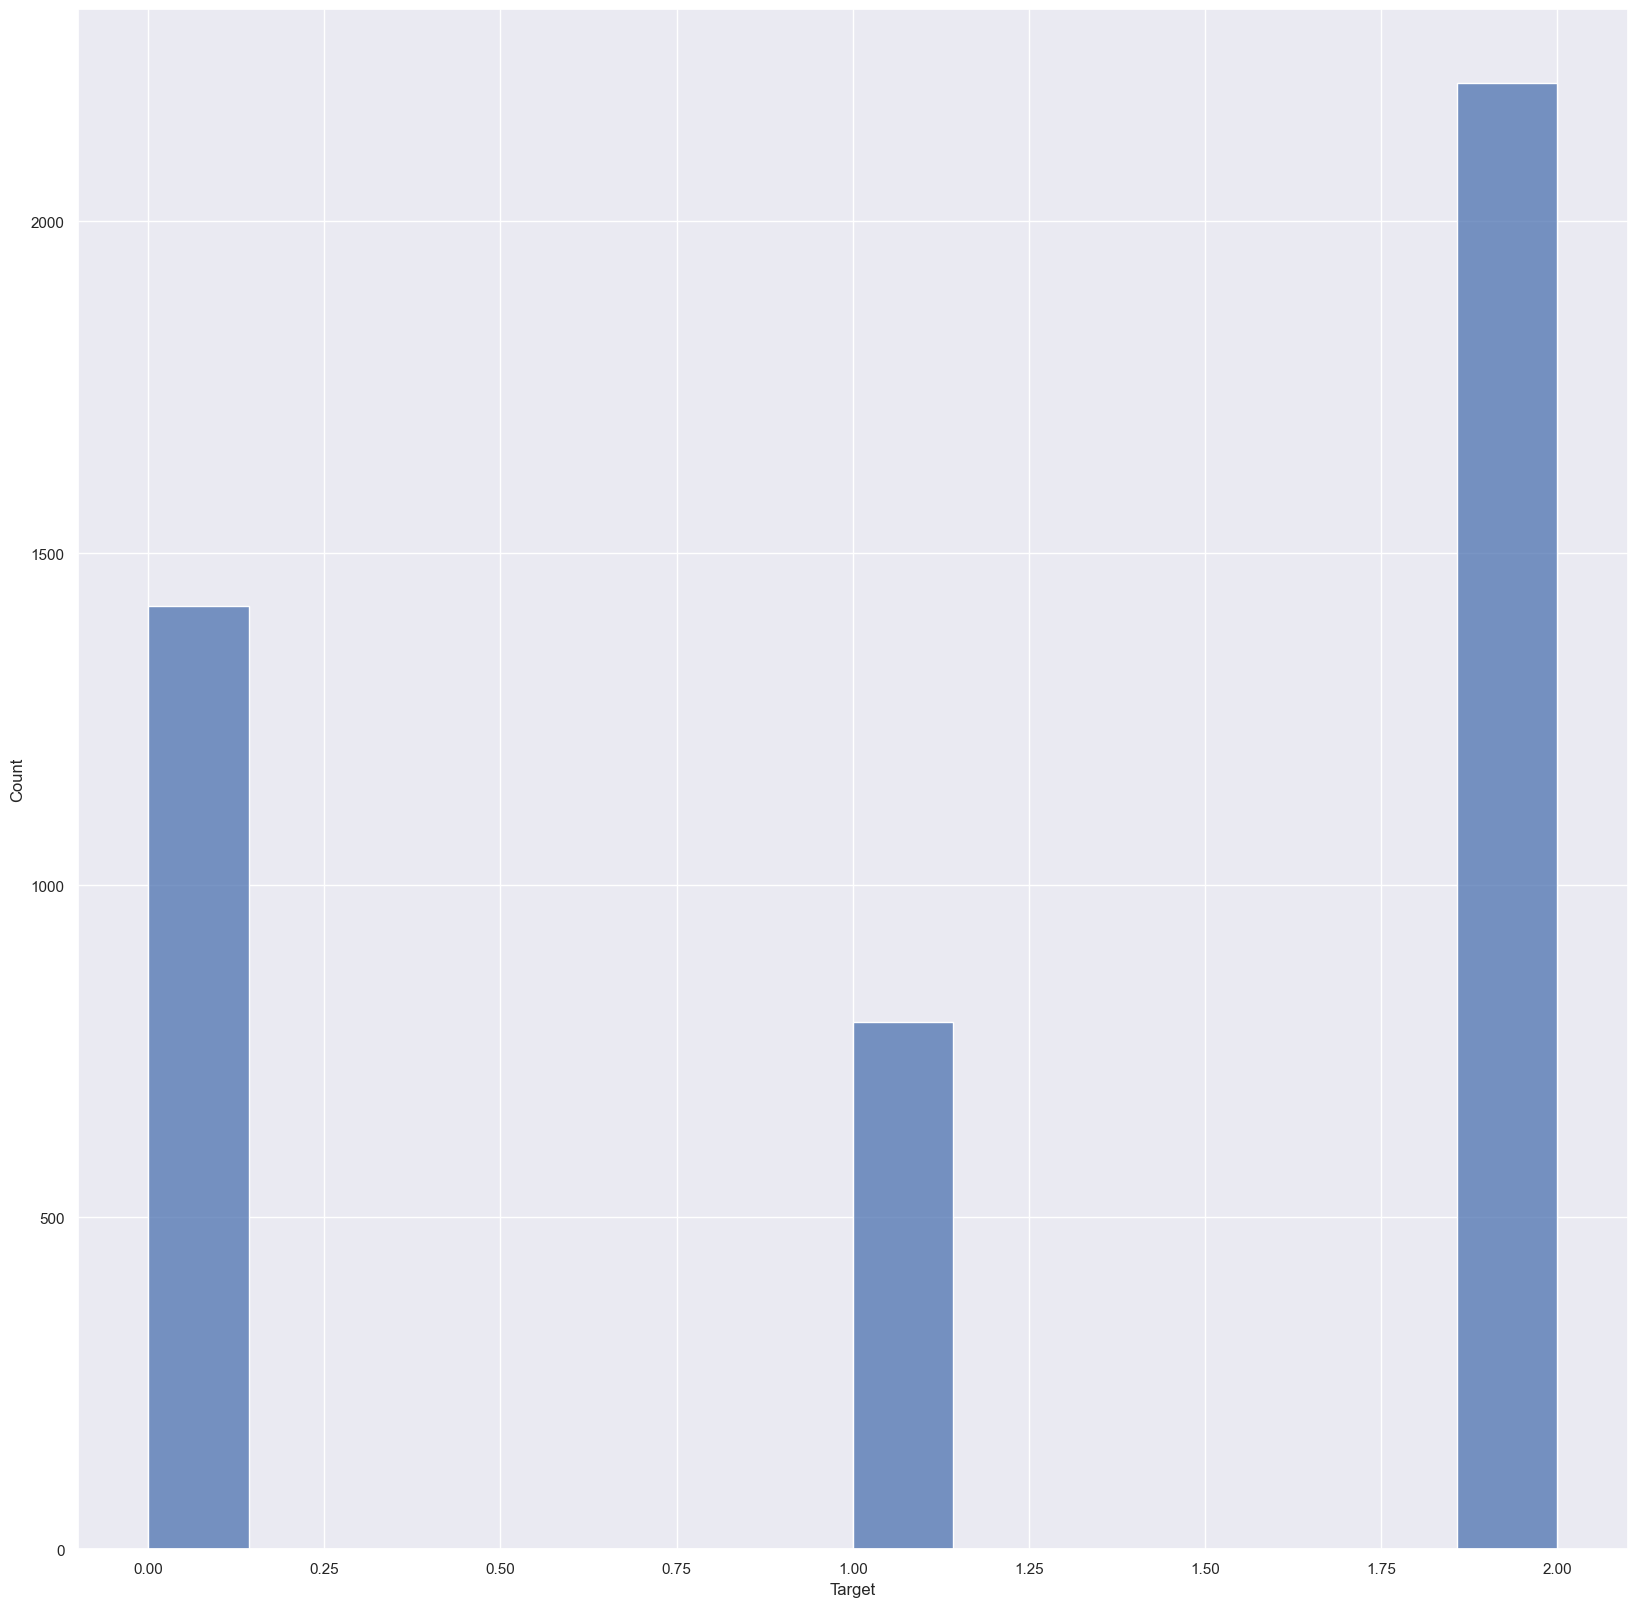

In [30]:
sns.histplot(y)
sns.set(rc={'figure.figsize':(5, 5)})

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [32]:
log = LogisticRegression(max_iter=1000)

In [33]:
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
log_pred = log.predict(x_test)

In [35]:
calculate_classification_metrics(y_test, log_pred)

{'accuracy': 0.7531645569620253,
 'precision': 0.6939771547248182,
 'recall': 0.6632552262571619,
 'f1': 0.6713587812953253}

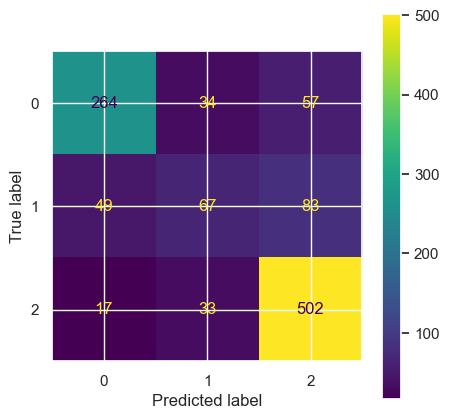

In [36]:
matrix(y_test, log_pred, log)

In [37]:
score_tree = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    score_tree.append(accuracy)
depth_score = zip(score_tree, range(1, 15))

In [38]:
best_score, max_depth = max(depth_score)

In [39]:
score_leaf = []
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    score_leaf.append(accuracy)
leaf_score = zip(score_leaf, range(1, 10))

In [40]:
score, min_leaf = max(leaf_score)

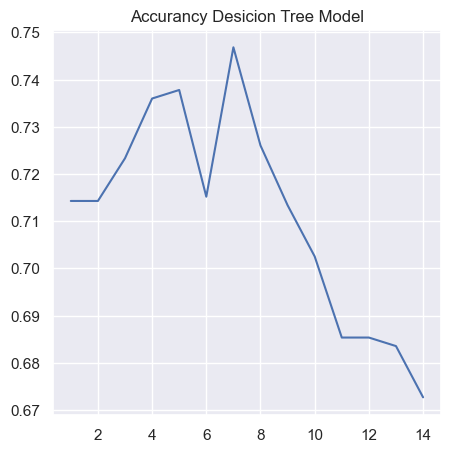

In [41]:
plt.title(f"Accurancy Desicion Tree Model")
plt.plot(range(1, 15), score_tree)

In [42]:
tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_leaf, random_state=42)

In [43]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=42)

In [44]:
tree_pred = tree.predict(x_test)

In [45]:
calculate_classification_metrics(y_test, tree_pred)

{'accuracy': 0.7495479204339964,
 'precision': 0.7026954752160877,
 'recall': 0.6600263172021227,
 'f1': 0.6721414492024443}

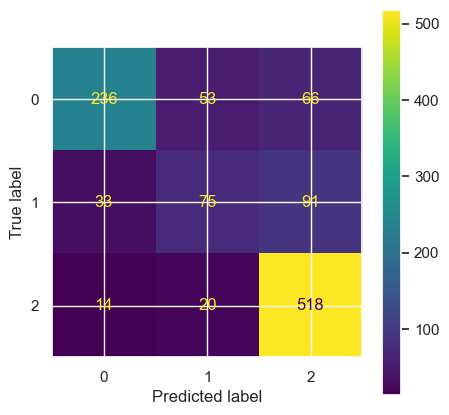

In [46]:
matrix(y_test, tree_pred, tree)

In [47]:
score_forest = []
for i in range(1, 15):
    model = RandomForestClassifier(max_depth=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    score_forest.append(accuracy)
depth_score = zip(score_forest, range(1, 15))

In [48]:
best_score, max_depth = max(depth_score)

In [49]:
score_leaf = []
for i in range(1, 10):
    model = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=i)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    score_leaf.append(accuracy)
leaf_score = zip(score_leaf, range(1, 10))

In [50]:
score, min_leaf = max(leaf_score)

In [51]:
forest = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_leaf, n_estimators=200, random_state=42)

In [52]:
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=9, n_estimators=200,
                       random_state=42)

In [53]:
forest_pred = forest.predict(x_test)

In [54]:
forest.feature_importances_.round(3)

array([0.001, 0.018, 0.006, 0.037, 0.002, 0.004, 0.012, 0.014, 0.005,
       0.   , 0.015, 0.069, 0.01 , 0.025, 0.04 , 0.   , 0.048, 0.104,
       0.002, 0.005, 0.033, 0.044, 0.287, 0.181, 0.001, 0.014, 0.012,
       0.014])

In [55]:
calculate_classification_metrics(y_test, forest_pred)

{'accuracy': 0.7576853526220615,
 'precision': 0.7062098701923006,
 'recall': 0.6487347433226552,
 'f1': 0.654873568251273}

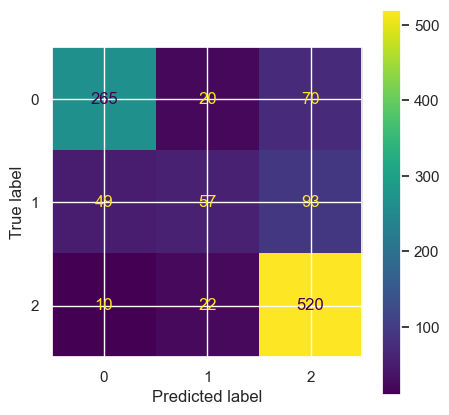

In [56]:
matrix(y_test, forest_pred, forest)

In [56]:
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [57]:
clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(x_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [58]:
svc = SVC(C=1000, gamma=0.0001, kernel='rbf')

In [59]:
svc.fit(x_train, y_train)

SVC(C=1000, gamma=0.0001)

In [60]:
svc_pred = svc.predict(x_test)

In [61]:
calculate_classification_metrics(y_test, svc_pred)

{'accuracy': 0.7549728752260397,
 'precision': 0.7065523027658694,
 'recall': 0.6767786164954185,
 'f1': 0.6868757384819054}

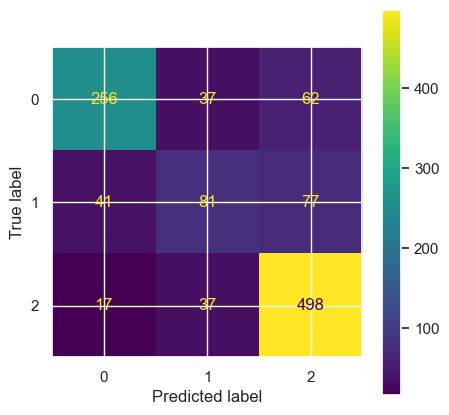

In [62]:
matrix(y_test, svc_pred, svc)

In [65]:
nb = GaussianNB()

In [69]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [70]:
gs_NB = GridSearchCV(estimator=nb,
                    param_grid=params_NB,
                    verbose=1,
                    scoring='accuracy')

In [71]:
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [72]:
gs_NB.best_params_

{'var_smoothing': 0.0003511191734215131}

In [73]:
bayes_class = GaussianNB(var_smoothing=0.00035)

In [74]:
bayes_class.fit(x_train, y_train)

GaussianNB(var_smoothing=0.00035)

In [75]:
nb_pred = bayes_class.predict(x_test)

In [76]:
calculate_classification_metrics(y_test, nb_pred)

{'accuracy': 0.6916817359855335,
 'precision': 0.6236114236988662,
 'recall': 0.5913860142380268,
 'f1': 0.5961188376394951}

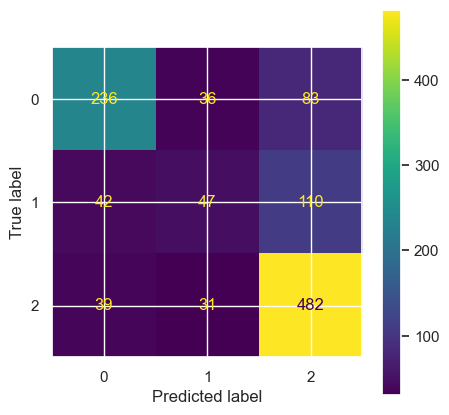

In [77]:
matrix(y_test, nb_pred, bayes_class)

In [111]:
sclf = StackingClassifier(estimators = [('forest', forest), ('tree', tree), ('svc', svc)],
                             final_estimator = log)

In [112]:
sclf.fit(x_train, y_train)

StackingClassifier(estimators=[('forest',
                                RandomForestClassifier(max_depth=11,
                                                       min_samples_leaf=9,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('tree',
                                DecisionTreeClassifier(max_depth=7,
                                                       min_samples_leaf=5,
                                                       random_state=42)),
                               ('svc', SVC(C=1000, gamma=0.0001))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [113]:
sclf_pred = sclf.predict(x_test)

In [114]:
calculate_classification_metrics(y_test, sclf_pred)

{'accuracy': 0.7721518987341772,
 'precision': 0.727908775759257,
 'recall': 0.6912020981275706,
 'f1': 0.7024179879495799}

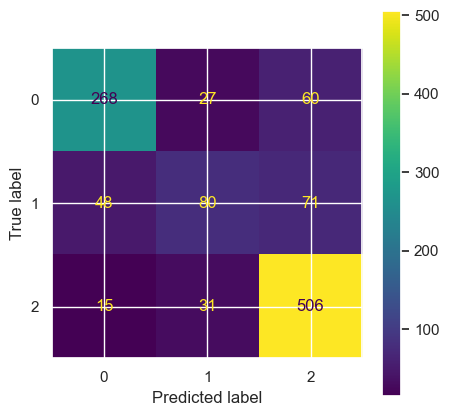

In [115]:
matrix(y_test, sclf_pred, sclf)

In [127]:
params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [128]:
model = GradientBoostingClassifier()
xgb = GridSearchCV(estimator=model,
                    param_grid=params,
                    verbose=1,
                    scoring='accuracy')

In [129]:
xgb.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [130]:
xgb.best_params_

{'max_depth': 4, 'min_samples_leaf': 9}

In [131]:
xgb = GradientBoostingClassifier(max_depth=4, min_samples_leaf=9, n_estimators=200)

In [132]:
xgb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=9, n_estimators=200)

In [133]:
xgb_pred = xgb.predict(x_test)

In [134]:
calculate_classification_metrics(y_test, xgb_pred)

{'accuracy': 0.7567811934900542,
 'precision': 0.7039205209881634,
 'recall': 0.68133161726165,
 'f1': 0.6894156093218461}

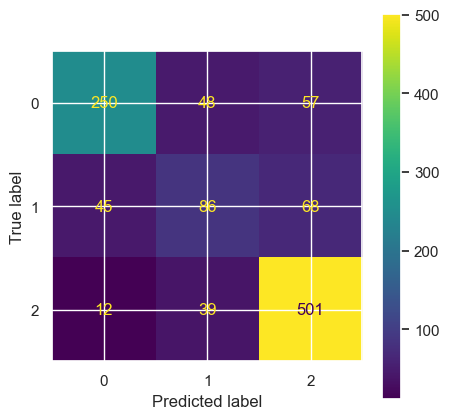

In [135]:
matrix(y_test, xgb_pred, xgb)

In [ ]:
### the best model is a StackingModel 